# In-depth machine learning examples

** taken from *Python for Data Science Handbook* **

Book can be purchased from [O'Reilly website](http://shop.oreilly.com/product/0636920034919.do); more notebooks available on [GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

## Naive Bayes

### Gaussian Naive Bayes
In this classifier, the assumption is that data from each label is drawn from a simple Gaussian distribution.

Because naive Bayesian classifiers make such stringent assumptions about data, they will generally not perform as well as a more complicated model. That said, they have several advantages:

* They are extremely fast for both training and prediction
* They provide straightforward probabilistic prediction
* They are often very easily interpretable
* They have very few (if any) tunable parameters

Naive Bayes classifiers tend to perform especially well in one of the following situations:

* When the naive assumptions actually match the data (very rare in practice)
* For very well-separated categories, when model complexity is less important
* For very high-dimensional data, when model complexity is less important

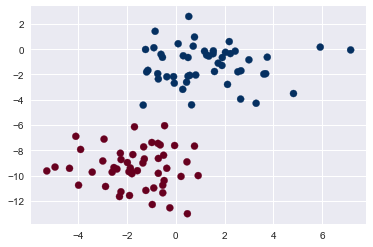

In [3]:
# sample data
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5) 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [4]:
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB()
model.fit(X, y);

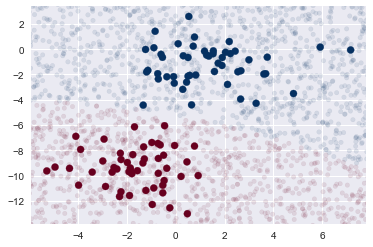

In [6]:
# Now let’s generate some new data and predict the label
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

# plot this new data to get an idea of where the decision boundary is
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

### Multinominal Naive Bayes
The multinomial distribution describes the probability of observing counts among a number of categories, and thus multinomial naive Bayes is most appropriate for features that represent counts or count rates.

In [10]:
# load sample data
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
# data.target_names

# select a few categories for simplicity
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space',
                  'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

# show sample record
# print(train.data[5])

In order to use this data for machine learning, we need to be able to convert the con‐ tent of each string into a vector of numbers. For this we will use the TF–IDF vectorizer, and create a pipeline that attaches it to a multinomial naive Bayes classifier.

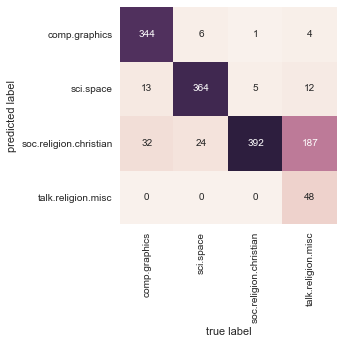

In [14]:
# create pipeline
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# apply pipeline
model.fit(train.data, train.target)
labels = model.predict(test.data)

# evaluate estimator performance
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

The very cool thing here is that we now have the tools to determine the category for any string, using the `predict()` method of this pipeline. 

In [15]:
# utility function
def predict_category(s, train=train, model=model): 
    pred = model.predict([s])
    return train.target_names[pred[0]]

# example prediction
predict_category('sending a payload to the ISS')

'sci.space'

## Linear Regression

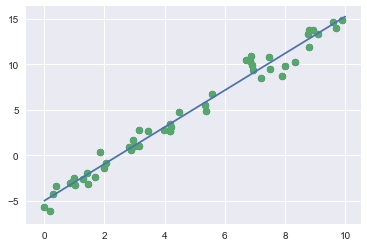

In [18]:
# sample data
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y=2*x-5+rng.randn(50) 
plt.scatter(x, y);

# fit best line
from sklearn.linear_model import LinearRegression 
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);

In [19]:
print("Model slope: ", model.coef_[0]) 
print("Model intercept:", model.intercept_)

Model slope:  2.02720881036
Model intercept: -4.99857708555


In [20]:
# multidimensional example
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])
model.fit(X, y) 

# print coefficients
print(model.intercept_) 
print(model.coef_)

0.5
[ 1.5 -2.   1. ]


### Basis function regression

#### Polynomial basis functions

In [21]:
# sample data
from sklearn.preprocessing import PolynomialFeatures 
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.]])

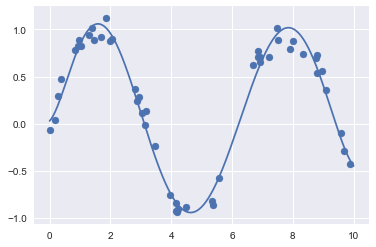

In [22]:
# example 7th degree polynomial pipeline
from sklearn.pipeline import make_pipeline 
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

# apply pipeline
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);

#### Gaussian basis functions
See code example in book (page 394 - 396

### Regularization
Penalizes large values of model parameters to avoid / reduce overfitting.

#### Ridge regression (L2 regularization)

The most common form of regularization is known as ridge regression or L2 regularization, sometimes also called Tikhonov regularization. This proceeds by penalizing the sum of squares (2-norms) of the model coefficients:

```
from sklearn.linear_model import Ridge
model = make_pipeline(OverFittingEstimator(), Ridge(alpha=0.1)) 
```

#### Lasso regularization (L1)

Another very common type of regularization is known as lasso, and involves penalizing the sum of absolute values (1-norms) of regression coefficients:

```
from sklearn.linear_model import Lasso
model = make_pipeline(OverFittingEstimator(), Lasso(alpha=0.001)) 
```

## Support Vector Machines (SVM)

SVM's are a powerful classification method for a number of reasons:

* Their dependence on relatively few support vectors means that they are very compact models, and take up very little memory.
* Once the model is trained, the prediction phase is very fast.
* Because they are affected only by points near the margin, they work well with high-dimensional data—even data with more dimensions than samples, which is a challenging regime for other algorithms.
* Their integration with kernel methods makes them very versatile, able to adapt to many types of data.

However, SVMs have several disadvantages as well:

* The scaling with the number of samples N is   N3   at worst, or   N2   for effi‐ cient implementations. For large numbers of training samples, this computa‐ tional cost can be prohibitive.
* The results are strongly dependent on a suitable choice for the softening parame‐ ter C. This must be carefully chosen via cross-validation, which can be expensive as datasets grow in size.
* The results do not have a direct probabilistic interpretation. This can be estima‐ ted via an internal cross-validation (see the probability parameter of SVC), but this extra estimation is costly.


With those traits in mind, I generally only turn to SVMs once other simpler, faster, and less tuning-intensive methods have been shown to be insufficient for my needs. Nevertheless, if you have the CPU cycles to commit to training and cross-validating an SVM on your data, the method can lead to excellent results.

Namespace:

`from sklearn.svm import SVC`

## Decision Trees and Random Forests

Random forests are an example of an ensemble learner built on decision trees.

Random forests are a powerful method with several advantages:

* Both training and prediction are very fast, because of the simplicity of the under‐ lying decision trees. In addition, both tasks can be straightforwardly parallelized, because the individual trees are entirely independent entities.
* The multiple trees allow for a probabilistic classification: a majority vote among estimators gives an estimate of the probability (accessed in Scikit-Learn with the predict_proba() method).
* The nonparametric model is extremely flexible, and can thus perform well on tasks that are underfit by other estimators.

Simple decision tree namespace:

`from sklearn.tree import DecisionTreeClassifier`

Random Forest namespace:

`from sklearn.ensemble import RandomForestClassifier`
`from sklearn.ensemble import RandomForestRegressor`



## Principal Component Analysis (PCA)

PCA is a fast and flexible unsupervised method for dimensionality reduction in data. Rather than attempting to predict the y values from the x values, the unsupervised learning problem attempts to learn about the relationship between the x and y values.

```
# syntax
from sklearn.decomposition import PCA \
pca = PCA(n_components=2)
pca.fit(X)

# results
print(pca.components_)
print(pca.explained_variance_)
```

#### PCA for dimensionality reduction

```
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X) 

print("original shape: ", X.shape) 
print("transformed shape:", X_pca.shape)
```

#### PCA as noise filtering

PCA can also be used as a filtering approach for noisy data. The idea is this: any components with variance much larger than the effect of the noise should be relatively unaffected by the noise.

#### PCA summary

In this section we have discussed the use of principal component analysis for dimensionality reduction, for visualization of high-dimensional data, for noise filtering, and for feature selection within high-dimensional data. Because of the versatility and interpretability of PCA, it has been shown to be effective in a wide variety of contexts and disciplines. Given any high-dimensional dataset, I tend to start with PCA in order to visualize the relationship between points, to understand the main variance in the data, and to understand the intrinsic dimensionality. Certainly PCA is not useful for every high-dimensional dataset, but it offers a straightforward and efficient path to gaining insight into high-dimensional data.

PCA’s main weakness is that it tends to be *highly affected by outliers* in the data. For this reason, many robust variants of PCA have been developed, many of which act to iteratively discard data points that are poorly described by the initial components. Scikit-Learn contains a couple interesting variants on PCA, including `RandomizedPCA` and `SparsePCA`, both also in the `sklearn.decomposition` submodule. `RandomizedPCA`, which we saw earlier, uses a nondeterministic method to quickly approximate the first few principal components in very high-dimensional data, while `SparsePCA` introduces a regularization term that serves to enforce sparsity of the components.

## Manifold Learning

While PCA is flexible, fast, and easily interpretable, it does not perform so well when there are *nonlinear* relationships within the data. 

In practice manifold learning tech‐ niques tend to be finicky enough that they are rarely used for anything more than simple qualitative visualization of high-dimensional data. The following are some of the particular challenges of manifold learning, which all contrast poorly with PCA:

* In manifold learning, there is no good framework for handling missing data. In contrast, there are straightforward iterative approaches for missing data in PCA.
* In manifold learning, the presence of noise in the data can “short-circuit” the manifold and drastically change the embedding. In contrast, PCA naturally filters noise from the most important components.
* The manifold embedding result is generally highly dependent on the number of neighbors chosen, and there is generally no solid quantitative way to choose an optimal number of neighbors. In contrast, PCA does not involve such a choice.
* In manifold learning, the globally optimal number of output dimensions is diffi‐ cult to determine. In contrast, PCA lets you find the output dimension based on the explained variance.
* In manifold learning, the meaning of the embedded dimensions is not always clear. In PCA, the principal components have a very clear meaning.
* In manifold learning the computational expense of manifold methods scales as O[N2] or O[N3]. For PCA, there exist randomized approaches that are generally much faster (though see the megaman package for some more scalable imple‐ mentations of manifold learning).

With all that on the table, the only clear advantage of manifold learning methods over PCA is their ability to preserve nonlinear relationships in the data; for that reason I tend to explore data with manifold methods only after first exploring them with PCA.

## k-Means Clustering

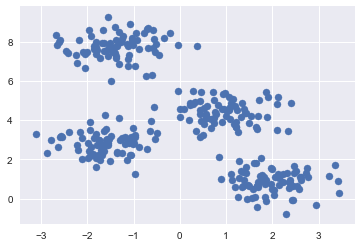

In [27]:
# sample data
from sklearn.datasets.samples_generator import make_blobs 
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

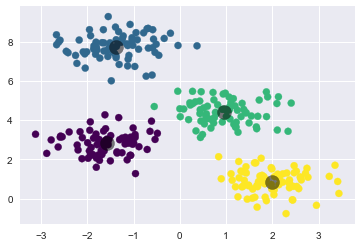

In [29]:
# perform clustering
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=4) 
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# visualize results
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Gaussian Mixture Models (GMM)

An important observation for k-means is that these cluster models must be circular: k- means has no built-in way of accounting for oblong or elliptical clusters. This can result in a mixing of cluster assignments where the resulting circles overlap. 

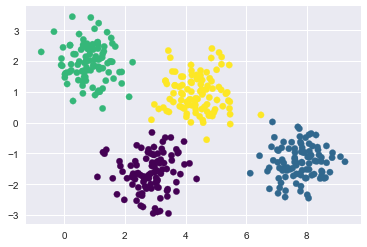

In [38]:
# sample data
from sklearn.datasets.samples_generator import make_blobs 
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0) 
X = X[:, ::-1] # flip axes for better plotting

# apply GMM
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [33]:
# show probabalistic cluster assignments
probs = gmm.predict_proba(X) 
print(probs[:5].round(3))

[[ 0.537  0.463  0.     0.   ]
 [ 0.     0.     0.     1.   ]
 [ 0.     0.     0.     1.   ]
 [ 1.     0.     0.     0.   ]
 [ 0.     0.     0.     1.   ]]


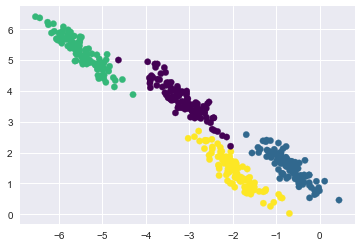

In [40]:
# transform clusters to elliptical shape
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

# repeat for elliptical clusters
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42).fit(X_stretched)
labels = gmm.predict(X_stretched)
plt.scatter(X_stretched[:, 0], X_stretched[:, 1], c=labels, s=40, cmap='viridis');

## Kernel Density Estimation

The free parameters of kernel density estimation are the kernel, which specifies the shape of the distribution placed at each point, and the kernel bandwidth, which con‐ trols the size of the kernel at each point. In practice, there are many kernels you might use for a kernel density estimation: in particular, the Scikit-Learn KDE implementation supports one of six kernels, which you can read about in Scikit-Learn’s Density Estimation documentation. Perhaps the most common use of KDE is in graphically representing distributions of points.

While there are several versions of kernel density estimation implemented in Python (notably in the SciPy and StatsModels packages), I prefer to use Scikit-Learn’s version because of its efficiency and flexibility. It is implemented in the `sklearn.neighbors.KernelDensity` estimator